In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
content = []
paths = ["raw/volkswagen_tiguan.txt", "raw/volkswagen_troc.txt", "raw/skoda_karoq.txt", "raw/skoda_octavia.txt", "raw/toyota_rav4.txt"]
for path in paths:
    with open(path, "r") as f:
        content += f.readlines()
        content += ["\n", "\n"]

In [3]:
annonces = []
prevL = ""

annonce_str = ""
for l in content:
    annonce_str += l
    if l == "\n" and prevL == "\n":
        annonces.append(annonce_str)
        annonce_str = ""
    prevL = l

len(annonces)

6710

In [4]:
cleaned = []
sizes = []
for annonce in annonces:
    clean = []
    title = annonce.split("\n")[0]
    if "skoda-karoq" in title or "volkswagen-tiguan" in title or "volkswagen-t-roc" in title or "skoda-octavia" in title or "toyota-rav" in title:
        for i, el in enumerate([e for e in annonce.split("\n") if e != "" and "," not in e]):
            clean.append(el)
        sizes.append(len(clean))
        if len(clean) <10:
            print(len(clean), clean)
        if len(clean) > 11:
            print(len(clean), clean)
        cleaned.append(clean)
len(cleaned)

6353

In [5]:
len(cleaned[0]), cleaned[0]

(11,
 ['volkswagen-tiguan-ii-phase-2-2021-auto-62300-km-diesel',
  'VOLKSWAGEN TIGUAN II phase 2',
  '2.0 TDI 150 ELEGANCE',
  '2021',
  'Auto',
  '62 300 km',
  'Diesel',
  '29 490 €',
  'Offre équitable',
  'WILLIAMSON-AUTOMOBILES',
  'PARIS'])

In [6]:
min(sizes)

10

In [7]:
max(sizes)

11

In [8]:
def extract(annonce):
    d = {}
    d["brand"] = annonce[0].split("-")[0]
    d["title"] = annonce[0]
    model = " ".join(w.lower() for w in annonce[1].split(" ")[:2])
    d["model"] = model
    d["serie"] = " ".join(annonce[1].split(" ")[2:])
    d["type"] = annonce[2]
    engine = annonce[2].split(" ")
    try:
        d["engineVolume"] = float(engine[0])
    except ValueError:
        print("VOLUME", model, engine[:3], annonce[0])
    d["engineType"] = engine[1]
    try:
        d["enginePower"] = int(engine[2])
    except ValueError:
        print("POWER", model, engine[:3], annonce[0])
    d["line"] = " ".join(engine[3:]) if len(engine) >=4 else "-"
    try:
        d["year"] = int(annonce[3])
        d["gearbox"] = annonce[4]
        d["km"] = int(annonce[5].replace(" ", "").replace("km", ""))
        d["gas"] = annonce[6]
        d["price"] = int(annonce[7].replace(" ", "").replace("€", ""))
    except ValueError:
        print('YKMP', annonce[3], annonce[5], annonce[6], annonce[7])
    d["label"] = annonce[-3] if "€" not in annonce[-3] else "-"
    d["place"] = annonce[-2]
    d["location"] = annonce[-1]
    
    return d

In [9]:
data = [extract(a) for a in cleaned]

df = pd.DataFrame(data)\
    .drop_duplicates() \
    .sort_values(["year", "km"])\
    .reset_index(drop=True)
df.to_csv("./processed/data.csv", index=True, index_label="idx")
df.head(3)

,brand,title,model,serie,type,engineVolume,engineType,enginePower,line,year,gearbox,km,gas,price,label,place,location
0,toyota,toyota-rav-4-1996-manual-189000-km-essence,toyota rav,4,2.0 HYBRIDE 129 GX,2.0,HYBRIDE,129,GX,1996,Manuelle,189000,Essence,5490,Analyse indisponible,Vendeur particulier,25
1,toyota,toyota-rav-4-1998-manual-124643-km-essence,toyota rav,4,2.0 HYBRIDE 129 GX,2.0,HYBRIDE,129,GX,1998,Manuelle,124643,Essence,7990,Analyse indisponible,E.P.A ESSENCE PASSION AUTOMOBILE,13
2,toyota,toyota-rav-4-1999-manual-181579-km-essence,toyota rav,4,2.0 HYBRIDE 129 GX,2.0,HYBRIDE,129,GX,1999,Manuelle,181579,Essence,5890,Analyse indisponible,P2C AUTOMOBILES,13


In [10]:
df[df.brand == "toyota"].engineVolume

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
6144    2.5
6147    2.5
6148    2.5
6151    2.5
6152    2.5
Name: engineVolume, Length: 794, dtype: float64

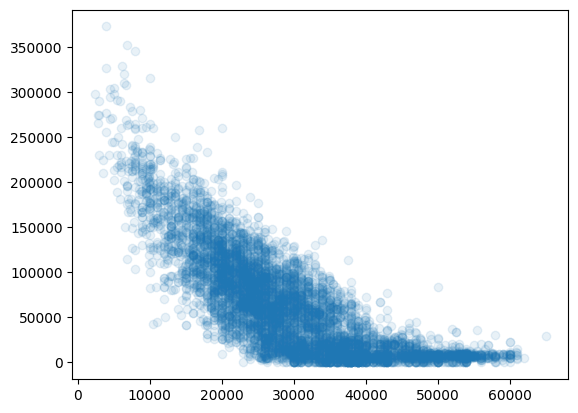

In [11]:
plt.scatter(df["price"].values, df["km"].values, alpha=0.1)
plt.show()